# Project 1 - Siddhant Sharma (18csu210)

## Clustering the Countries by using Unsupervised Learning for HELP International
### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Importing Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Dictionary

In [4]:
data_dict = pd.read_csv('data-dictionary.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


## Data Preprocessing

In [5]:
data = data.set_index(data['country'])
data.drop(columns = 'country',inplace=True)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [7]:
print('Number of Missing Values:', data.isna().sum().sum()) 

Number of Missing Values: 0


### No Missing Values

In [8]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df = scalar.fit_transform(data)
df = pd.DataFrame(data = df, index = data.index, columns = data.columns)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
Vanuatu,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
Venezuela,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
Vietnam,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299


## Data Visualization

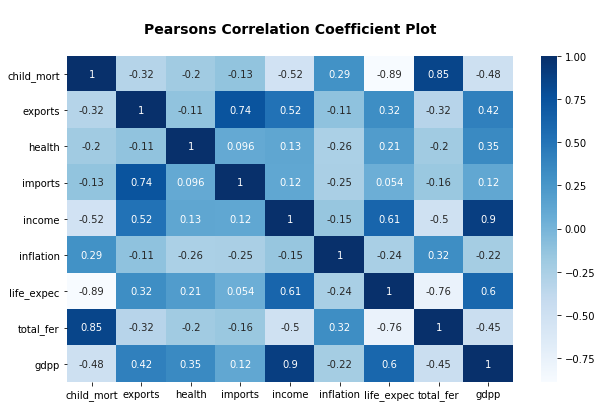

In [9]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.title('\nPearson''s Correlation Coefficient Plot\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

### Insights from Pearson's Correlation Coefficient Plot :
- Imports have high positive correlation with Exports (+0.74)
- Total Fertility has very high positive correlation with Child Mortality (+0.85)
- GDPP has fairly high positive correlation with Life Expectancy (+0.60)
- GDPP has very high positive correlation with Income (+0.90)
- Income has fairly high positive correlation with Exports (+0.52)
- Total Fertility has fairly high negative correlation with Life Expectancy (-0.76)
- Child Mortality Rate has high negative correlation with GDPP (-0.48)
- Health has high positive correlation with GDPP (0.35)

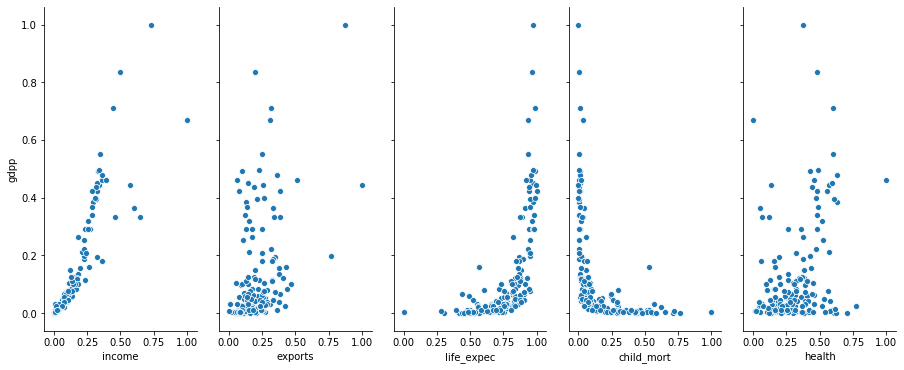

In [10]:
sns.pairplot(df, y_vars = ['gdpp'], x_vars = ['income', 'exports', 'life_expec', 'child_mort', 'health'], height = 5, aspect = 0.5)

### GDPP has positive correlation with all positive aspects like income, exports, life expectancy, etc and it has negative correlation with negative aspects like child mortality rate

## K-Means Clustering

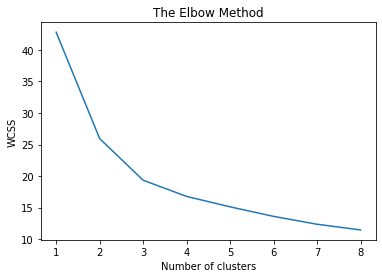

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Since we are getting 2 elbows i.e 2 and 3, lets find out which is better.

### Silhouette Score

In [12]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2)
preds = kmeans.fit_predict(df)
sc = silhouette_score(df, preds)
print('Silhouette Score for n=2:', sc)

Silhouette Score for n=2: 0.37902922788692567


In [13]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3)
preds = kmeans.fit_predict(df)
sc = silhouette_score(df, preds)
print('Silhouette Score for n=3:', sc)

Silhouette Score for n=3: 0.34265474105126204


### Davies-Bouldin Index

In [14]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=2)
preds = kmeans.fit(df)
labels = preds.labels_
db_index = davies_bouldin_score(df, labels)
print('Davies-Bouldin Index for n=2:', db_index)

Davies-Bouldin Index for n=2: 1.021336995840431


In [15]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3)
preds = kmeans.fit(df)
labels = preds.labels_
db_index = davies_bouldin_score(df, labels)
print('Davies-Bouldin Index for n=3:', db_index)

Davies-Bouldin Index for n=3: 1.119529463176319


### Silhouette Score closer to 1 is better and low value of Davies-Bouldin Index is better 
## n_clusters = 2 forms better clusters 

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)
cluster = km.fit_predict(df)
data_km = data
data_km['cluster'] = cluster
data_km

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1


In [17]:
data_km0 = data_km[cluster == 0]
data_km0.nsmallest(5, 'gdpp',  keep='first')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


In [18]:
data_km1 = data[cluster == 1]
data_km1.nsmallest(5, 'gdpp',  keep='first')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,592,1
Bangladesh,49.4,16.00,3.52,21.8,2440,7.14,70.4,2.33,758,1
Cambodia,44.4,54.10,5.68,59.5,2520,3.12,66.1,2.88,786,1
Kyrgyz Republic,29.6,51.60,6.18,81.7,2790,10.00,68.5,3.10,880,1
Vietnam,23.3,72.00,6.84,80.2,4490,12.10,73.1,1.95,1310,1


### Cluster 0 for K-Means clustering is considered Developing Countries

### GDPP is the deciding factor as discussed by Previous Charts
#### So these are the Countries with lowest GDPP
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

## Hierarchical Clustering

### Dendogram

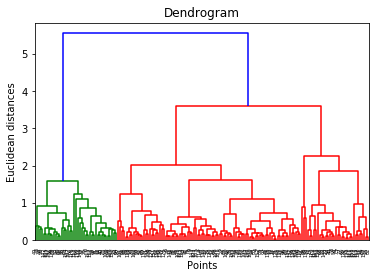

In [19]:
import scipy.cluster.hierarchy as sch
data = pd.read_csv('Country-data.csv')
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean distances')
plt.show()

### We can clearly see 2 clusters, green and red

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster = hc.fit_predict(df)
data_hc = data
data_hc['cluster'] =cluster
data_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [21]:
data_hc0 = data_hc[cluster == 0]
data_hc0.nsmallest(5, 'gdpp',  keep='first')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563,0
109,Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,592,0
146,Tajikistan,52.4,14.90,5.98,58.6,2110,12.50,69.6,3.51,738,0
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.14,70.4,2.33,758,0


In [22]:
data_hc1 = data[cluster == 1]
data_hc1.nsmallest(5, 'gdpp',  keep='first')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1


### Cluster 1 for K-Means clustering is considered Developing Countries

### GDPP is the deciding factor as discussed by Previous Charts
#### So these are the Countries with lowest GDPP
- Burundi
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar

# My Country Suggestion is 
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone